# 데이터 확인

In [58]:
import pandas as pd

DATAPATH = '/Users/sim-yeji/PythonImageWorkspace/HA/merged_file_4d.csv'

data = pd.read_csv(DATAPATH,comment="#")
data

,time,id,x,y
0,0.0,0,1.019608,12.908276
1,0.1,0,19.902481,35.185548
2,0.2,0,38.785354,57.462819
3,0.3,0,57.668227,79.740091
4,0.4,0,76.551100,102.017362
...,...,...,...,...
20195,9.6,199,-10.300753,86.341290
20196,9.7,199,-10.418545,87.238268
20197,9.8,199,-10.536337,88.135247
20198,9.9,199,-10.654129,89.032226


In [60]:
data.describe

<bound method NDFrame.describe of        time   id          x           y
0       0.0    0   1.019608   12.908276
1       0.1    0  19.902481   35.185548
2       0.2    0  38.785354   57.462819
3       0.3    0  57.668227   79.740091
4       0.4    0  76.551100  102.017362
...     ...  ...        ...         ...
20195   9.6  199 -10.300753   86.341290
20196   9.7  199 -10.418545   87.238268
20197   9.8  199 -10.536337   88.135247
20198   9.9  199 -10.654129   89.032226
20199  10.0  199 -10.771921   89.929204

[20200 rows x 4 columns]>

In [61]:
data.shape

(20200, 4)

# 가속도 계산, 레이블 지정

In [97]:

import csv
import numpy as np

filename = 'merged_file_4d.csv'
data = np.loadtxt(filename, delimiter=',', skiprows=1)
ids = np.unique(data[:, 1])  # 물체 id 목록

features = []
labels = []

# 물체별 가속도 계산
for id in ids:
    idx = np.where(data[:, 1] == id)[0]
    t = data[idx, 0]
    x = data[idx, 2]
    y = data[idx, 3]

    if id < 100:
        dt = t[1] - t[0]
        vx = np.diff(x) / dt  # x 방향 속도
        vy = np.diff(y) / dt  # y 방향 속도
        ax = np.diff(vx) / dt  # x 방향 가속도
        ay = np.diff(vy) / dt  # y 방향 가속도
        avg_ax = round(np.mean(ax),2)  # x 방향 평균 가속도
        avg_ay = round(np.mean(ay),2)  # y 방향 평균 가속도

     
        if avg_ax == 0 and avg_ay == 0:
            label = 0  # 직선 운동
        elif avg_ax == 0 and avg_ay < 0:
            label = 1  # 포물선 운동
        else:
            label = 2  # 바운싱 운동

        features.append([avg_ax, avg_ay])
        labels.append(label)

    if id >= 100:
        vx = np.diff(x) / np.diff(t)  # x 방향 가속도
        vy = np.diff(y) / np.diff(t)  # y 방향 가속도
        avg_ax = round(np.mean(vx),2)  # x 방향 평균 가속도
        avg_ay = round(np.mean(vy),2)  # y 방향 평균 가속도

      
        if avg_ax == 0 and avg_ay == 0:
            label = 0  # 직선 운동
        elif avg_ax == 0 and avg_ay < 0:
            label = 1  # 포물선 운동
        else:
            label = 2  # 바운싱 운동

    
        features.append([avg_ax, avg_ay])
        labels.append(label)
print(features)
print(labels)

[[-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, 0.0], [-0.0, -0.0], [-0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [0.0, 0.0], [-0.0, -0.0], [-0.0, 0.0], [0.0, -0.0], [0.0, -0.0], [-0.0, -0.0], [0.0, -0.0], [0.0, -0.0], [-0.0, -0.0], [-0.0, -0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [-0.0, 0.0], [-0.0, 0.0], [-0.0, -0.0], [-0.0, 0.0], [-0.0, 0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, -0.0], [-0.0, -0.0], [-0.0, 0.0], [-0.0, -0.0], [-0.0, -0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [-0.0, -0.0], [0.0, 0.0], [0.0, -999.5], [0.0, -999.5], [-0.0, -999.5], [0.0, -999.5], [-0.0, -999.5], [-0.0, -999.5], [-0.0, -999.5], [0.0, -999.5], [0.0, -999.5], [-0.0, -999.5], [0.0, -999.5], [0.0, -999.5], [-0.0, -999.5], [-0.0, -999.5], [-0.0, -999.5], [-0.0, -999.5], [0.0, -999.5], [-0.0, -999.5], [0.0, -999.5], [0.0, -999.5], [0.0, -999.5], [-0.0, -999.5], [0.0, -999

# train, test split

In [98]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


In [99]:
from sklearn.preprocessing import StandardScaler

# 데이터 컬럼 단위 정규화
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (140, 2)
Test set dimension is (60, 2)


# 모델링

## 1. 단순 모델링 (사용자가 하이퍼 파라미터 정의)

In [104]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성 학습
rfc = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators 트리의 개수
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
from sklearn.metrics import accuracy_score

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9833


## 2.단일 하이퍼 파라미터에 대한 Grid search

In [107]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

cv_scores = []
estimator_list =[i for i in range(0,50,1)] #0-50까지 중에 최적 tree개수 찾기
for i in tqdm(range(0,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]


100%|███████████████████████████████████████████| 50/50 [00:19<00:00,  2.58it/s]


In [108]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"정확도:{max(cv_scores):0.4f}") 

최적의 tree개수:13


Train set에 대한 성능 (10 fold cross validation)
정확도:1.0000


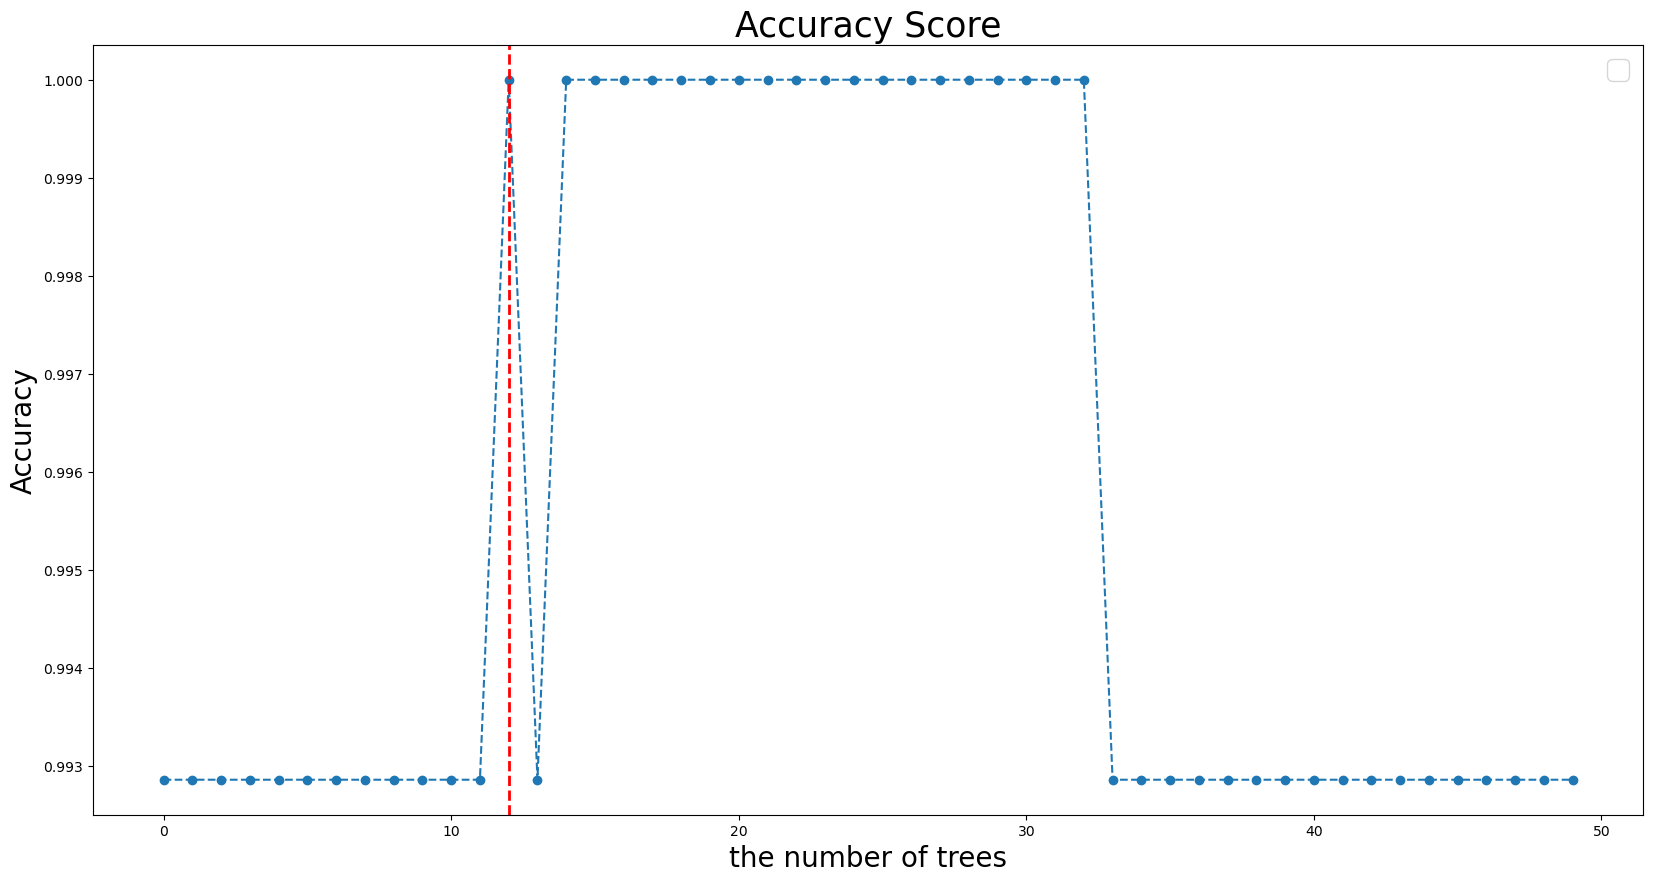

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [110]:
# n_estimators=13
rfc = RandomForestClassifier(n_estimators=13, n_jobs=-1, random_state=2021)
rfc.fit(X_train, y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9833


## 3. 전체 하이퍼 파라미터에 대한 Grid search (파라미터 최적화)

In [111]:
from sklearn.model_selection import GridSearchCV

#내가 직접 파라미터 범위 찾기 [50, 60, 70]
rfc = RandomForestClassifier(random_state=2021)
param_grid = {
    'n_estimators': [50, 60, 70],
    'max_depth': [10,15,20],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_features':['auto','sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=12)
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [50, 60, 70]},
             verbose=1)

In [112]:
# 최적의 하이퍼 파라미터 셋
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'n_estimators': 70}

In [113]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
print(result_table[['params', 'mean_test_score']])

                                                params  mean_test_score
161  {'criterion': 'entropy', 'max_depth': 20, 'max...         1.000000
128  {'criterion': 'entropy', 'max_depth': 15, 'max...         1.000000
62   {'criterion': 'gini', 'max_depth': 20, 'max_fe...         1.000000
122  {'criterion': 'entropy', 'max_depth': 15, 'max...         1.000000
59   {'criterion': 'gini', 'max_depth': 20, 'max_fe...         1.000000
..                                                 ...              ...
57   {'criterion': 'gini', 'max_depth': 20, 'max_fe...         0.992857
55   {'criterion': 'gini', 'max_depth': 20, 'max_fe...         0.992857
54   {'criterion': 'gini', 'max_depth': 20, 'max_fe...         0.992857
52   {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.992857
81   {'criterion': 'entropy', 'max_depth': 10, 'max...         0.992857

[162 rows x 2 columns]


In [114]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=50, n_estimators=70,
                       random_state=2021)

In [115]:
# Train set에 대한 성능
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9833


In [116]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import recall_score, precision_score

recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')


print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ') 

정확도:0.9833  |  민감도:0.9885  |  정밀도:0.9722


/Users/sim-yeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


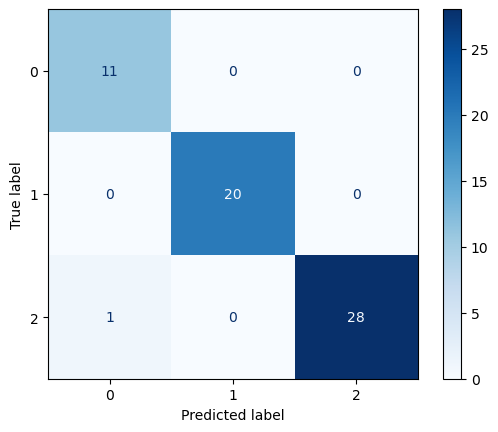

In [117]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()  

#예측값은 1 실제값은 2 인게 한개